# K Means Clustering Project (Universities classification - Private vs Public)

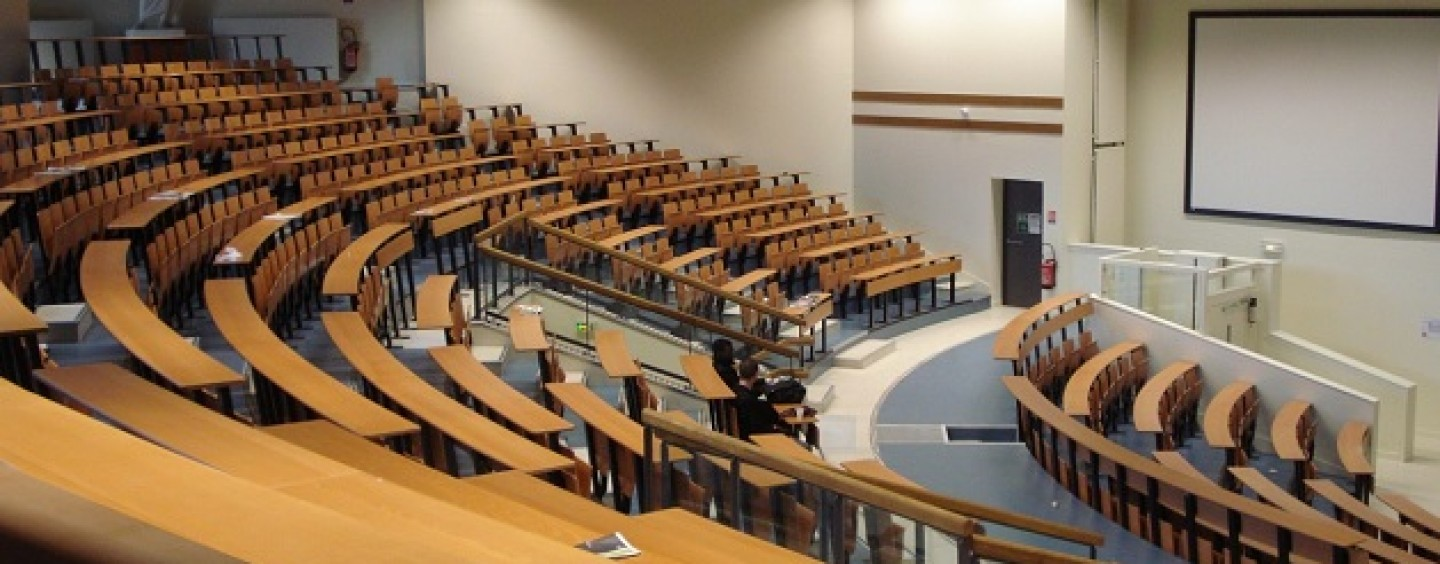

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.
___
## Types Clustering:
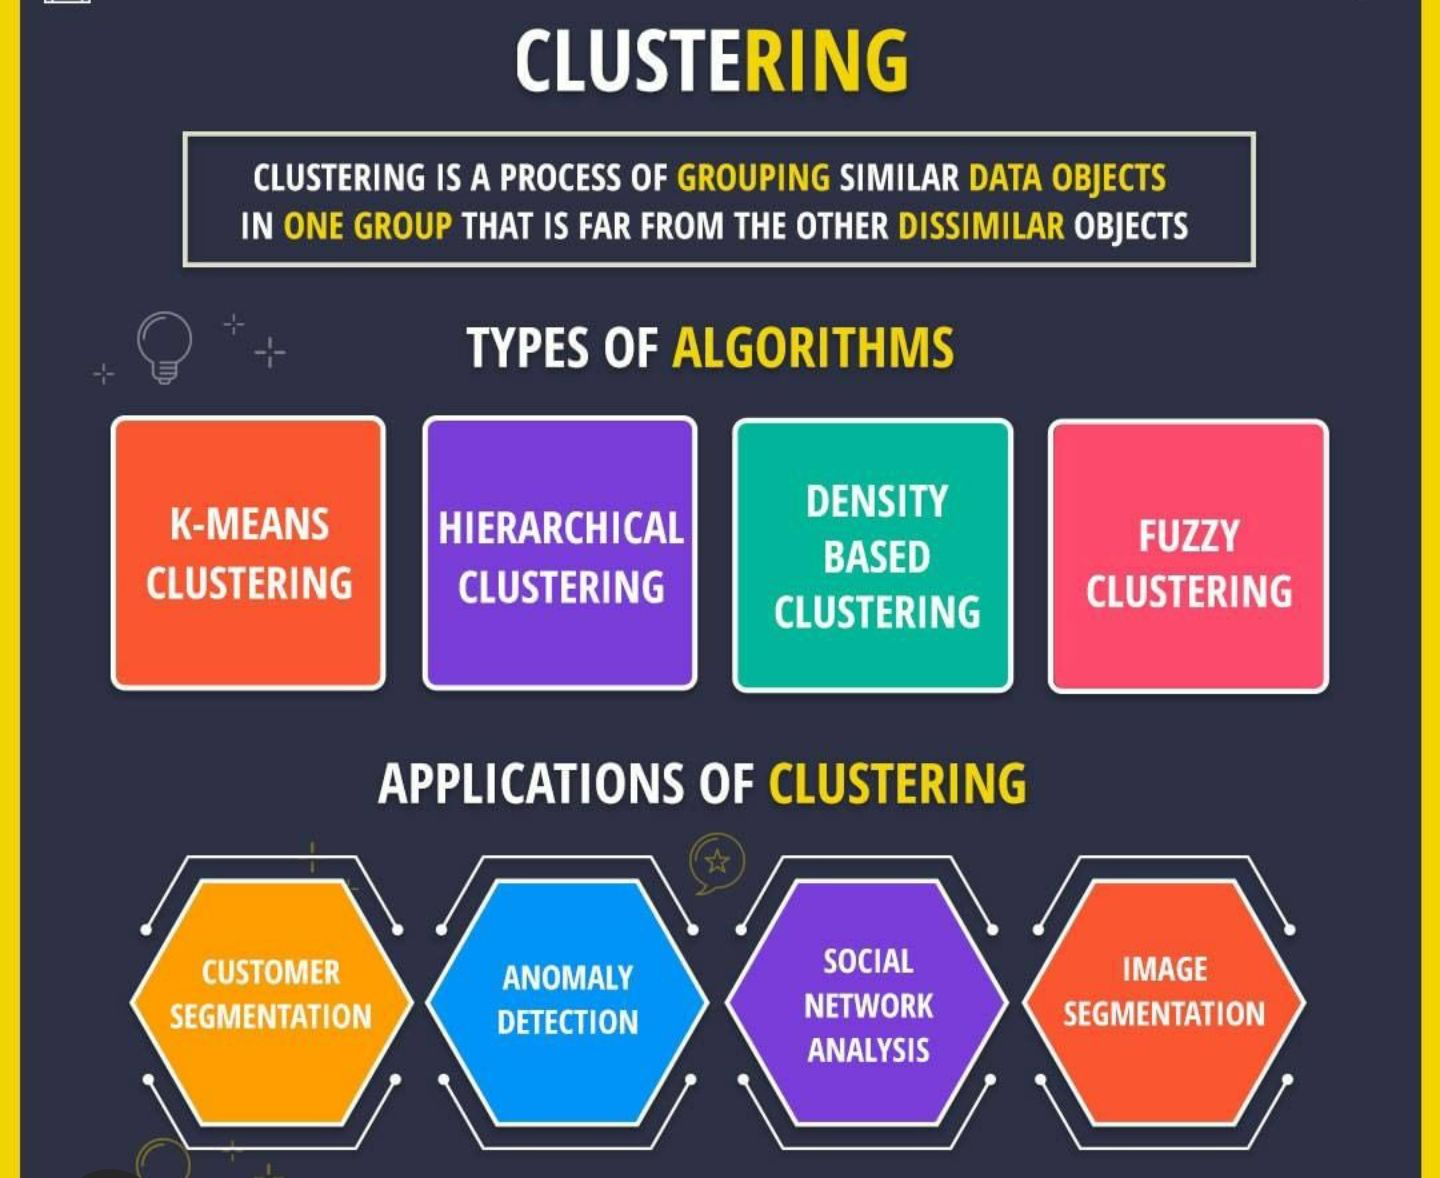
### Connectivity-based clustering
* Distance based
* E.g., Hierarchical clustering


### Centroid-based clustering
* Represents each cluster by a single mean vector
* E.g., k-means algoritm


### Distribution-based clustering
* Modeled using statistical distributions
* E.g., Multivariate normal distributions used by the expectation-maximization algorithm.


### Density-based clustering
* Defines clusters as connected dense regions in the data space.
* E.g., DBSCAN

# 1. Import Libraries

**Import the libraries you usually use for data analysis.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# 2. Get the Data

In [ ]:
data = pd.read_csv("/kaggle/input/college-data/data.csv")
data.head()

**Check the info() and describe() methods on the data.**

In [ ]:
data.info()

In [ ]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

# 3. Exploratory Data Analysis (EDA)

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

**Create a similar histogram for the Grad.Rate column.**

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [ ]:
data.loc[data.grad_rate > 100]

**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [ ]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

# 4. K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [ ]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [ ]:
kmeans = KMeans(2)

**Fit the model to all the data except for the Private label.**

In [ ]:
kmeans.fit(data.drop('private', axis=1))

**What are the cluster center vectors?**

In [ ]:
kmeans.cluster_centers_

# 5. Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [ ]:
data['private'] = data.private.astype("category").cat.codes

In [ ]:
data.private

In [ ]:
data.head()

In [ ]:
kmeans.labels_

**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!